In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

path = "c:\Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False


## 데이터 불러오기

In [2]:
subway2019 = pd.read_excel('./2019_1_to_8.xlsx', header = 1)
subway2020 = pd.read_csv('./2020_1_to_8.csv', encoding='cp949')
subway2021 = pd.read_csv('./subway.csv', encoding='cp949')

In [60]:
column_lists_2021 = list(subway2021)
column_lists_2021 = column_lists_2021[5:]
column_lists_2021

['6시이전',
 '6시-7시',
 '7시-8시',
 '8시-9시',
 '9시-10시',
 '10시-11시',
 '11시-12시',
 '12시-13시',
 '13시-14시',
 '14시-15시',
 '15시-16시',
 '16시-17시',
 '17시-18시',
 '18시-19시',
 '19시-20시',
 '20시-21시',
 '21시-22시',
 '22시-23시',
 '23시이후']

In [62]:
subway2021["합 계"] = subway2021[column_lists_2021].sum(axis=1)

## 2019 승차인원 최상위 최하위

<BarContainer object of 5 artists>

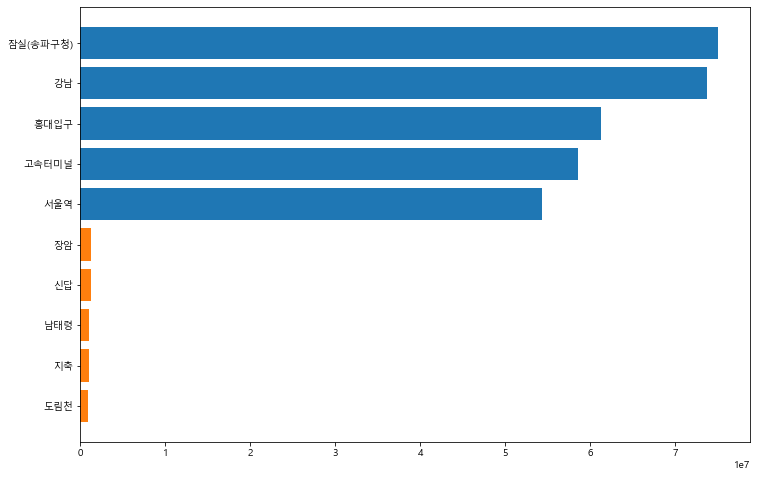

In [3]:
sum2019 = subway2019.iloc[:, [3, -1]].copy()
sum2019 = sum2019.groupby('역명', as_index=True).sum()
sum2019 = sum2019.sort_values(by=['합 계'], ascending=False)
plt.figure(figsize=(12, 8))
plt.gca().invert_yaxis()
plt.barh(sum2019.head(5).index, sum2019.head(5)['합 계'])
plt.barh(sum2019.tail(5).index, sum2019.tail(5)['합 계'])

## 2020 승차인원 최상위 최하위

<BarContainer object of 5 artists>

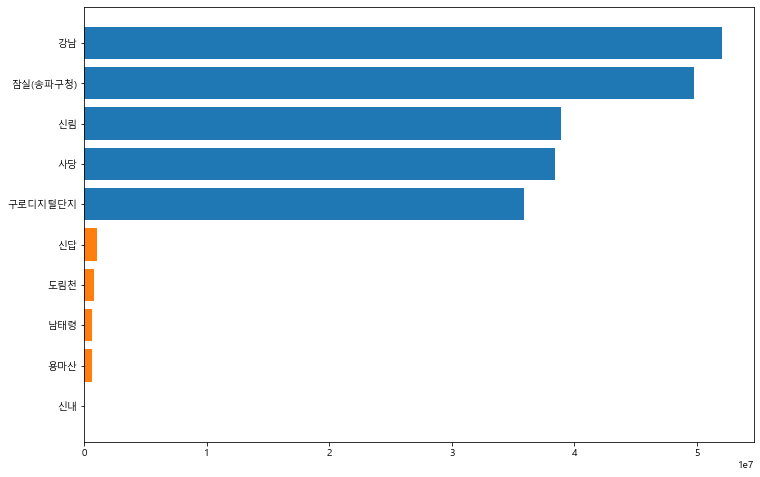

In [4]:
subway2020['합 계'] = subway2020.iloc[:, 5:].sum(axis=1)
sum2020 = subway2020.iloc[:, [3, -1]].copy()
sum2020 = sum2020.groupby('역명', as_index=True).sum()
sum2020 = sum2020.sort_values(by=['합 계'], ascending=False)
plt.figure(figsize=(12, 8))
plt.gca().invert_yaxis()
plt.barh(sum2020.head(5).index, sum2020.head(5)['합 계'])
plt.barh(sum2020.tail(5).index, sum2020.tail(5)['합 계'])


## 2019-2020 승차인원 증감

,합 계_x,합 계_y,증감
역명,,,
홍대입구,61262414,34808784,-26453630
잠실(송파구청),75027268,49770716,-25256552
고속터미널,58573002,35689196,-22883806
강남,73786674,52035659,-21751015
서울역,54368137,33432155,-20935982
...,...,...,...
장암,1290474,1061155,-229319
도림천,922197,774267,-147930
마곡,4660150,4692569,32419


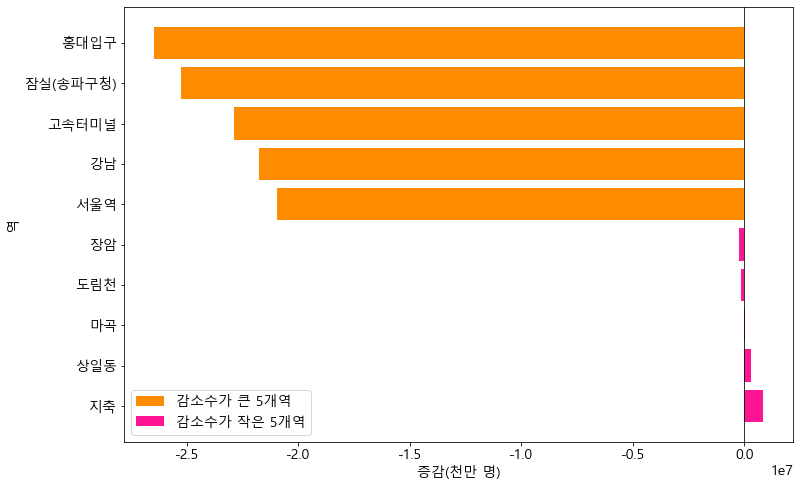

In [34]:
def plotDifference(df1, df2):
    temp1 = df1.iloc[:, [3, -1]].copy()
    temp1 = temp1.groupby('역명', as_index=False).sum()
    temp2 = df2.iloc[:, [3, -1]].copy()
    temp2 = temp2.groupby('역명', as_index=True).sum()
    sumDiff = pd.merge(temp1, temp2, on='역명', how = 'inner')
    sumDiff['증감'] = sumDiff.iloc[:, 2] - sumDiff.iloc[:, 1]
    sumDiff = sumDiff.set_index('역명')
    sumDiff = sumDiff.sort_values(by='증감')
    plt.figure(figsize=(12, 8))
    plt.rc('font', size=14)
    plt.gca().invert_yaxis()
    plt.barh(sumDiff.head(5).index, sumDiff.head(5)[
             '증감'], color='darkorange', label='감소수가 큰 5개역')
    plt.barh(sumDiff.tail(5).index, sumDiff.tail(5)[
             '증감'], color='deeppink', label='감소수가 작은 5개역')
    plt.axvline(x=0, color='black', linewidth=0.8)
    plt.xlabel('증감(천만 명)')
    plt.ylabel('역')
    plt.legend()
    return sumDiff

plotDifference(subway2019, subway2020)


,합 계_x,합 계_y,증감%
역명,,,
낙성대,21594377,3067653,-85.794205
용마산,4536908,646311,-85.754373
명동,29203204,12205404,-58.205257
종합운동장,10348345,4720726,-54.381826
이대,14964311,7613832,-49.120063
...,...,...,...
양평,4791998,4180268,-12.765656
성수,21968163,19477461,-11.337780
마곡,4660150,4692569,0.695664


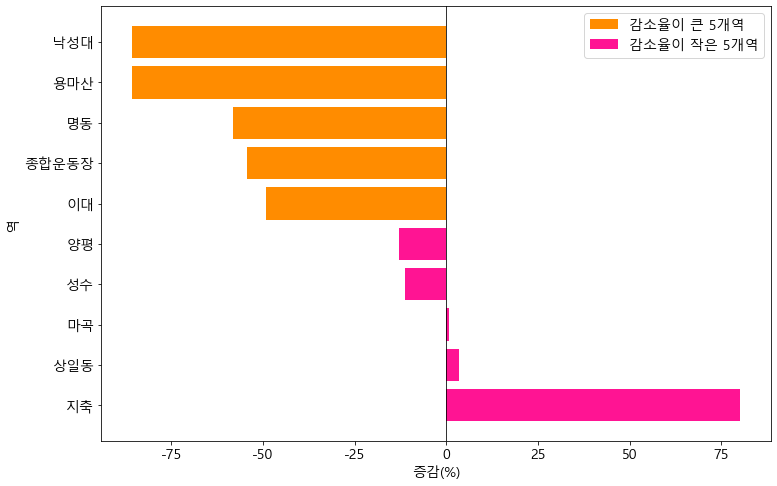

In [44]:
def plotDifferencePercent(df1, df2):
    temp1 = df1.iloc[:, [3, -1]].copy()
    temp1 = temp1.groupby('역명', as_index=False).sum()
    temp2 = df2.iloc[:, [3, -1]].copy()
    temp2 = temp2.groupby('역명', as_index=True).sum()
    sumDiff = pd.merge(temp1, temp2, on='역명', how='inner')
    sumDiff['증감%'] = (sumDiff.iloc[:, 2] - sumDiff.iloc[:, 1]) / sumDiff.iloc[:, 1] * 100
    sumDiff = sumDiff.set_index('역명')
    sumDiff = sumDiff.sort_values(by='증감%')
    plt.figure(figsize=(12, 8))
    plt.rc('font', size=14)
    plt.gca().invert_yaxis()
    plt.barh(sumDiff.head(5).index, sumDiff.head(5)['증감%'], color='darkorange', label = '감소율이 큰 5개역')
    plt.barh(sumDiff.tail(5).index, sumDiff.tail(5)['증감%'], color='deeppink', label = '감소율이 작은 5개역')
    plt.axvline(x=0, color='black', linewidth=0.8)
    plt.xlabel('증감(%)')
    plt.ylabel('역')
    plt.legend()
    return sumDiff

plotDifferencePercent(subway2019, subway2020)


## 2019년, 2021년 9월 비교

In [7]:
subway201909 = subway2019[subway2019['날짜'].dt.month == 9]
subway201909

,날짜,호선,역번호,역명,구분,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,합 계
133650,2019-09-01,1호선,150,서울역,승차,362,344,531,989,1356,...,3393,3693,3424,3043,2861,2654,2435,894,22,41791
133651,2019-09-01,1호선,150,서울역,하차,206,1076,1087,1261,1950,...,3140,3057,2705,2579,2035,1562,1003,570,177,37775
133652,2019-09-01,1호선,151,시청,승차,87,77,146,220,320,...,1441,1598,1265,1152,1124,785,500,206,6,13474
133653,2019-09-01,1호선,151,시청,하차,55,350,465,782,1007,...,959,629,432,284,241,278,173,120,42,13575
133654,2019-09-01,1호선,152,종각,승차,228,169,160,246,313,...,2239,2171,2037,2038,1902,1847,1211,486,23,21563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,2019-09-30,8호선,2825,신흥,하차,20,84,141,229,202,...,377,420,669,600,346,298,229,170,73,5430
150146,2019-09-30,8호선,2826,수진,승차,158,288,701,968,484,...,418,374,358,196,163,141,124,47,9,6305
150147,2019-09-30,8호선,2826,수진,하차,26,75,202,630,246,...,386,397,631,569,336,273,266,160,59,5855
150148,2019-09-30,8호선,2827,모란,승차,73,132,462,537,272,...,434,382,420,245,155,162,146,46,20,5085


In [8]:
subway202009 = subway2020[subway2020['날짜'].str.contains('2020-09')]
subway202009

,날짜,호선,역번호,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,...,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후,합 계
134580,2020-09-01,1호선,150,서울역,승차,349,398,1144,1783,1052,...,1662,3447,5802,2520,1556,1331,632,239,2,28692
134581,2020-09-01,1호선,150,서울역,하차,190,1036,2984,6074,3595,...,1097,1472,1677,1070,624,487,258,164,12,27293
134582,2020-09-01,1호선,151,시청,승차,61,99,218,255,256,...,1051,2385,4680,1722,1246,1068,391,108,1,16553
134583,2020-09-01,1호선,151,시청,하차,141,643,2506,5948,2651,...,313,293,271,181,95,101,35,23,2,16437
134584,2020-09-01,1호선,152,종각,승차,78,92,168,234,347,...,1641,4208,6628,2686,1968,1553,539,139,4,25325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151223,2020-09-30,8호선,2825,신흥,하차,17,35,33,69,92,...,197,180,138,135,126,113,92,58,5,2117
151224,2020-09-30,8호선,2826,수진,승차,50,74,108,154,172,...,180,160,115,83,63,48,42,13,0,2244
151225,2020-09-30,8호선,2826,수진,하차,11,40,41,65,74,...,148,145,145,128,111,96,86,52,8,1925
151226,2020-09-30,8호선,2827,모란,승차,37,48,54,94,107,...,146,144,102,89,64,65,60,17,0,1875


,합 계_x,합 계_y,증감
역명,,,
홍대입구,4641462,2214710,-2426752
고속터미널,4655883,2440776,-2215107
잠실(송파구청),5616398,3420736,-2195662
강남,5458778,3377852,-2080926
서울역,4261722,2252233,-2009489
...,...,...,...
신답,99760,76068,-23692
장암,105619,84485,-21134
도림천,73555,61212,-12343


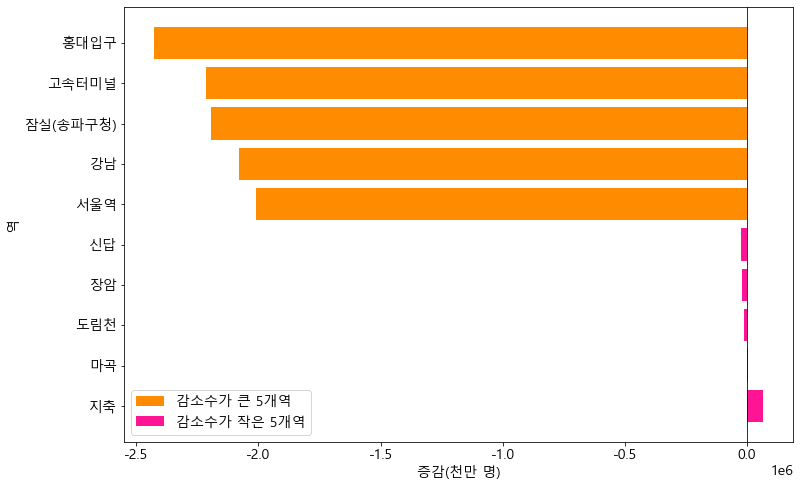

In [36]:
plotDifference(subway201909, subway202009)

,합 계_x,합 계_y,증감%
역명,,,
명동,2280092,772171,-66.134217
종합운동장,816294,321661,-60.594957
한양대,792559,322718,-59.281517
이태원,974360,424944,-56.387372
이대,1225448,534838,-56.355716
...,...,...,...
신정(은행정),642198,564396,-12.114955
산성,340761,312652,-8.248890
상일동,669271,644728,-3.667124


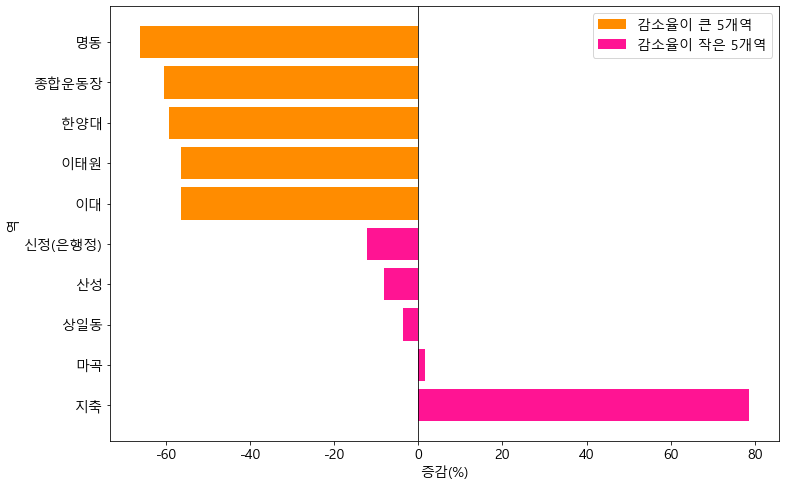

In [37]:
plotDifferencePercent(subway201909, subway202009)

,합 계_x,합 계_y,증감
역명,,,
강남,5155264,4144706,-1010558
잠실(송파구청),4647909,3901135,-746774
사당,3649868,2991019,-658849
종로3가,2892123,2279233,-612890
서울역,3159501,2610580,-548921
...,...,...,...
도림천,74477,63453,-11024
남태령,63402,52770,-10632
산성,291602,281629,-9973


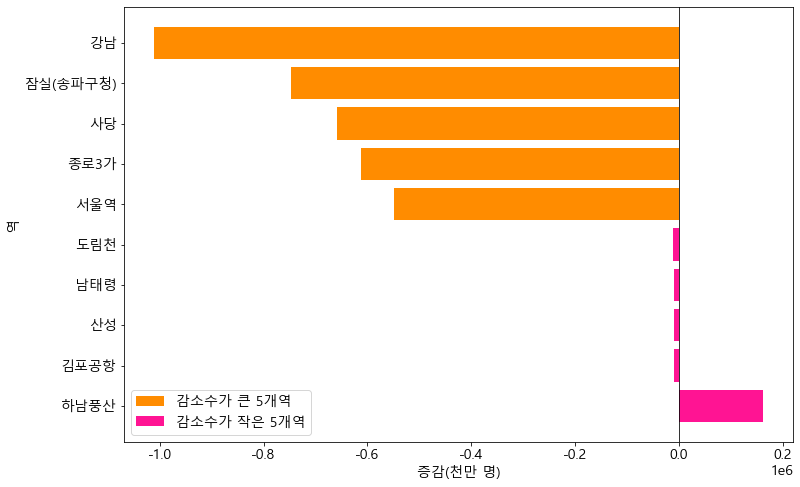

In [46]:

subway202007 = subway2020[subway2020['날짜'].str.contains('2020-07')]
subway202008 = subway2020[subway2020['날짜'].str.contains('2020-08')]

plotDifference(subway202007, subway202008)


,합 계_x,합 계_y,증감%
역명,,,
여의나루,581286,339996,-4.150969e+01
뚝섬유원지,535891,351780,-3.435605e+01
회현(남대문시장),1313153,948695,-2.775442e+01
상일동,979666,709260,-2.760186e+01
학여울,119664,87832,-2.660115e+01
...,...,...,...
올림픽공원(한국체대),213131,189709,-1.098949e+01
대림(구로구청),1884358,1678927,-1.090191e+01
산성,291602,281629,-3.420073e+00


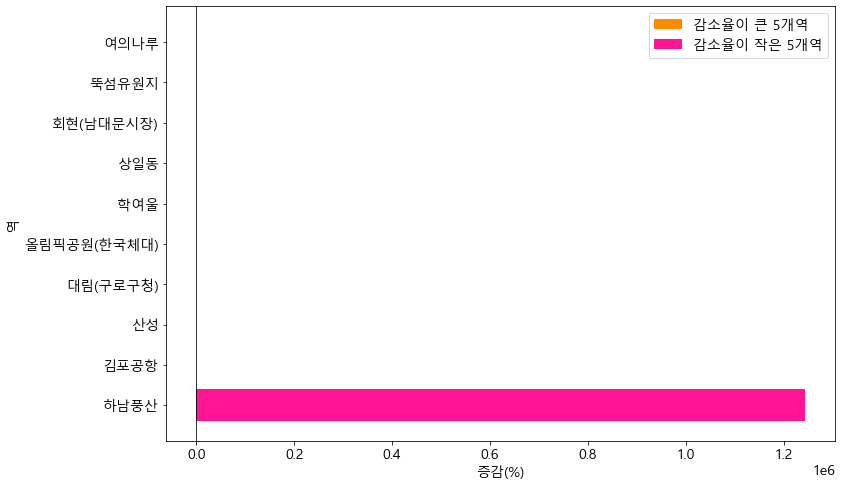

In [47]:
plotDifferencePercent(subway202007, subway202008)

## 2020년 9월, 10월 비교 (수도권 거리두기 2.5단계->1단계 완화)

,합 계_x,합 계_y,증감
역명,,,
동작(현충원),155786,142663,-13123
용두(동대문구청),117114,115838,-1276
도림천,61212,64958,3746
신답,76068,81278,5210
용답,127339,133309,5970
...,...,...,...
사당,2721980,3292028,570048
고속터미널,2440776,3083286,642510
홍대입구,2214710,2977171,762461


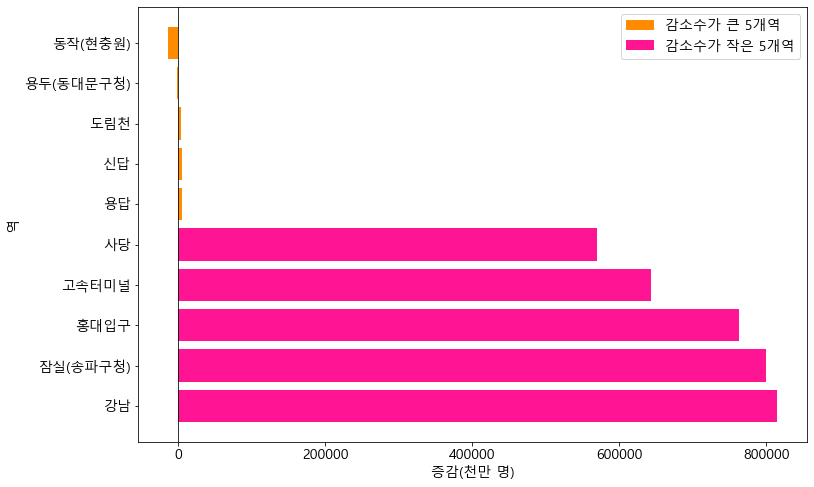

In [42]:
# 신내역 야간에만 운영하기때문에 삭제
subway2020= subway2020.drop(subway2020[subway2020['역명']=='신내'].index)
subway202009 = subway2020[subway2020['날짜'].str.contains('2020-09')]
subway202010 = subway2020[subway2020['날짜'].str.contains('2020-10')]

plotDifference(subway202009, subway202010)


,합 계_x,합 계_y,증감%
역명,,,
동작(현충원),155786,142663,-8.423735
용두(동대문구청),117114,115838,-1.089537
제기동,924383,958132,3.650976
용답,127339,133309,4.688273
춘의,432912,456330,5.409413
...,...,...,...
안국,779759,1025014,31.452667
홍대입구,2214710,2977171,34.427126
이태원,424944,574108,35.102037


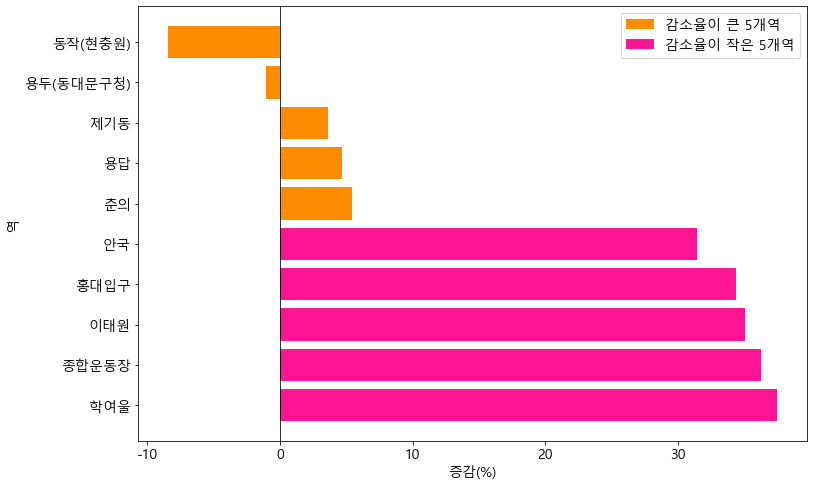

In [45]:

plotDifferencePercent(subway202009, subway202010)

## 2020년 10월, 12월 비교 (수도권 사회적 거리두기 1->2.5단계 격상)

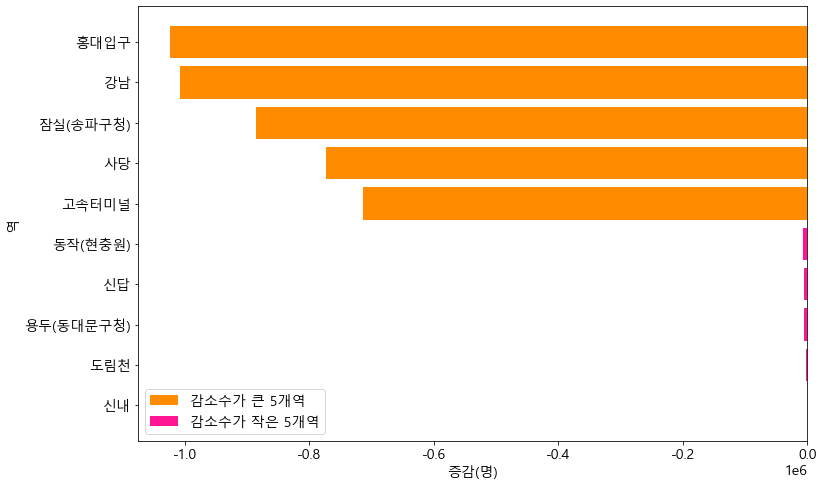

In [13]:
subway202012 = subway2020[subway2020['날짜'].str.contains('2020-12')]
plotDifference(subway202010, subway202012)

,합 계_x,합 계_y,증감%
역명,,,
여의나루,459466,298556,-35.021090
홍대입구,2977171,1952754,-34.409075
월드컵경기장(성산),315019,209041,-33.641780
이태원,574108,382426,-33.387795
종합운동장,438278,300115,-31.524056
...,...,...,...
동작(현충원),142663,134848,-5.477945
용두(동대문구청),115838,110426,-4.672042
양평,340724,324960,-4.626619


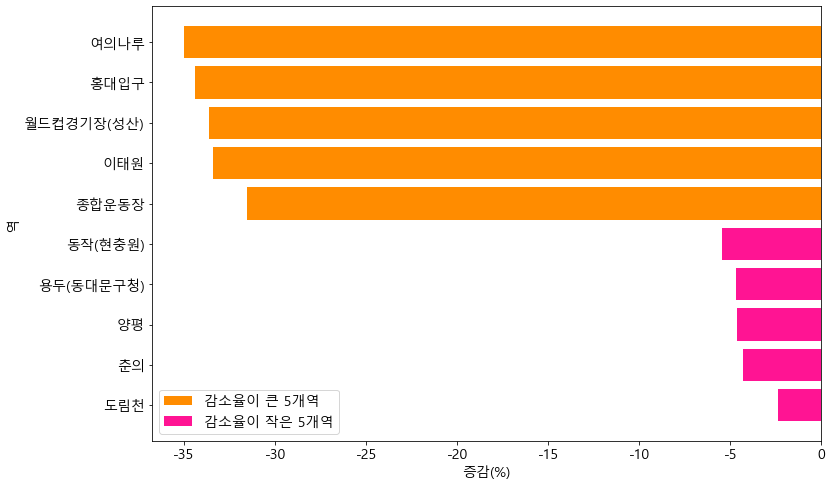

In [50]:
plotDifferencePercent(subway202010, subway202012)

## 2020년, 2021년 8월 비교

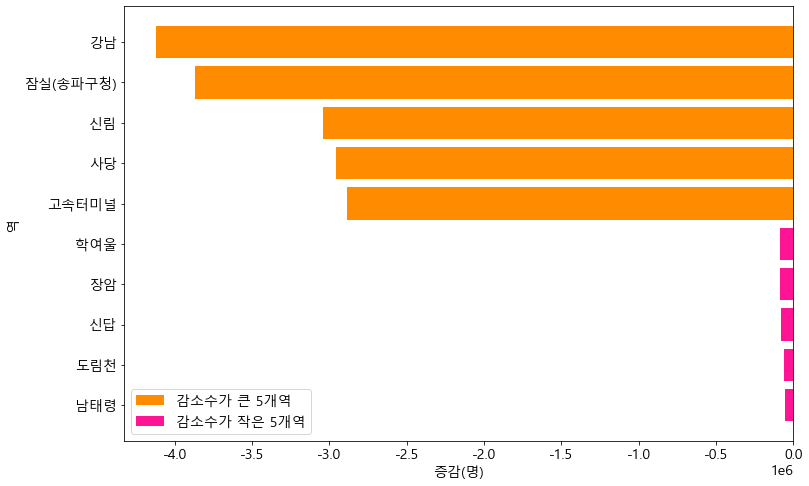

In [15]:
subway202008 = subway2020[subway2020['날짜'].str.contains('2020-08')]
subway202108 = subway2021[subway2021['날짜'].str.contains('2021-08')]
plotDifference(subway202008, subway202108)

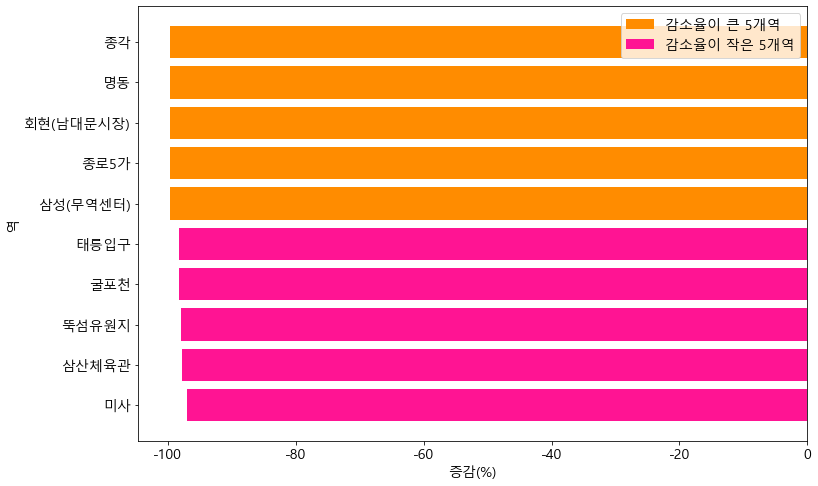

In [16]:
plotDifferencePercent(subway202008, subway202108)

## 2020년 4월, 5월 비교 (이태원발 코로나바이러스 집단 감염, 거리두기 완화)

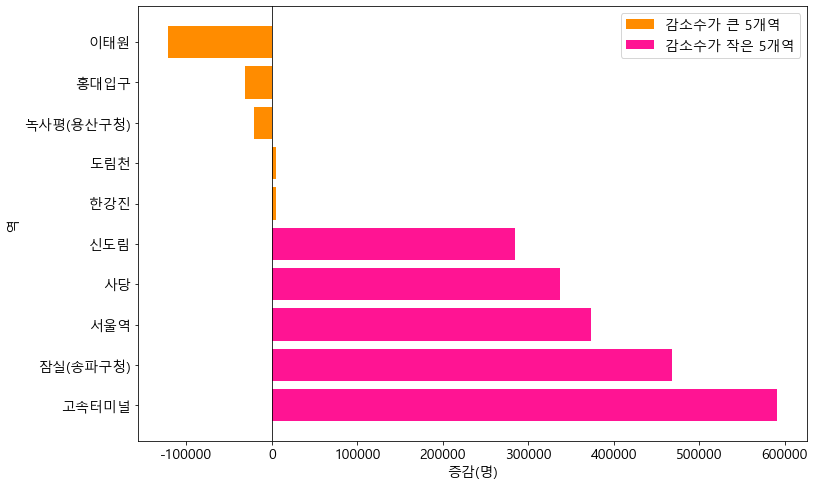

In [17]:
subway202004 = subway2020[subway2020['날짜'].str.contains('2020-04')]
subway202005 = subway2020[subway2020['날짜'].str.contains('2020-05')]
plotDifference(subway202004, subway202005)

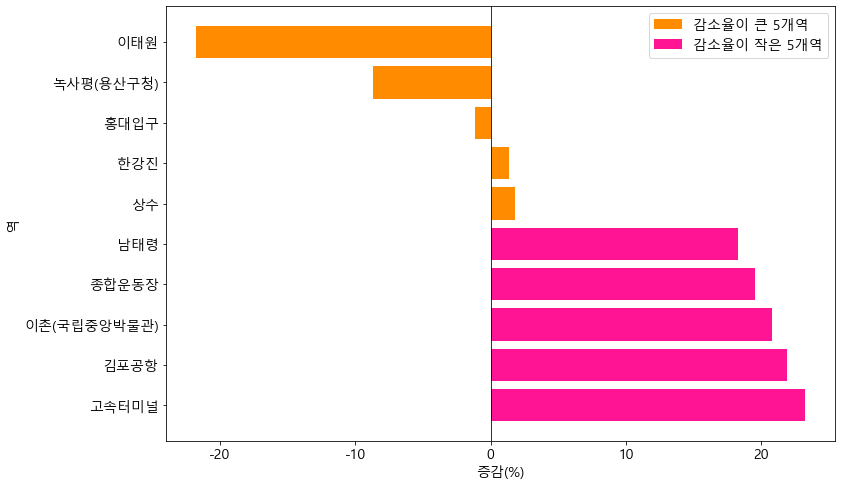

In [18]:
plotDifferencePercent(subway202004, subway202005)

## 2020년 7월, 8월 비교(사랑제일교회 코로나바이러스 집단 감염)

,합 계_x,합 계_y,증감
역명,,,
강남,5155264,4144706,-1010558
잠실(송파구청),4647909,3901135,-746774
사당,3649868,2991019,-658849
종로3가,2892123,2279233,-612890
서울역,3159501,2610580,-548921
...,...,...,...
신답,93642,79793,-13849
도림천,74477,63453,-11024
남태령,63402,52770,-10632


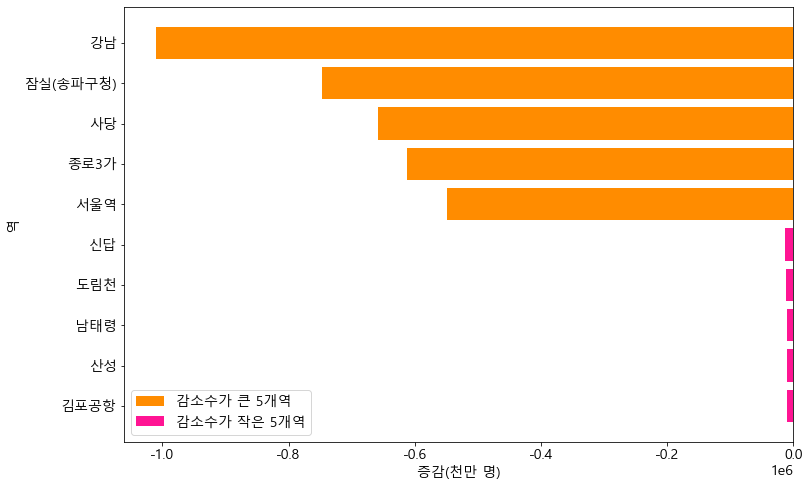

In [48]:
subway202007 = subway2020[subway2020['날짜'].str.contains('2020-07')]
# 하남풍산역 8월부터 집계되어 삭제
subway202007 = subway202007.drop(subway202007[subway202007['역명']=='하남풍산'].index)
plotDifference(subway202007, subway202008)


,합 계_x,합 계_y,증감%
역명,,,
여의나루,581286,339996,-41.509687
뚝섬유원지,535891,351780,-34.356054
회현(남대문시장),1313153,948695,-27.754420
상일동,979666,709260,-27.601856
학여울,119664,87832,-26.601150
...,...,...,...
이태원,529217,469968,-11.195597
올림픽공원(한국체대),213131,189709,-10.989485
대림(구로구청),1884358,1678927,-10.901909


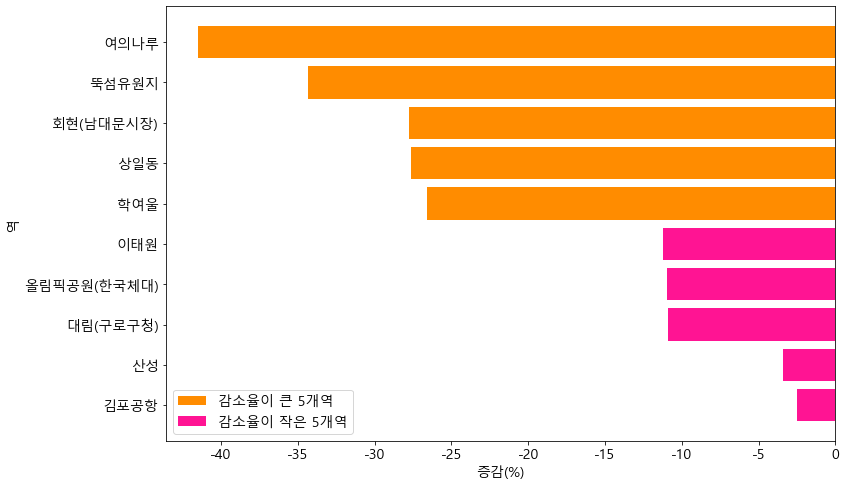

In [51]:
plotDifferencePercent(subway202007, subway202008)

In [68]:
subway202102.head(10)

,날짜,호선,역번호,역명,구분,6시이전,6시-7시,7시-8시,8시-9시,9시-10시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시이후,합 계
0,2021-01-01,1호선,150,서울역,승차,86,111,157,306,333,...,837,796,839,658,579,479,510,445,101,9339
1,2021-01-01,1호선,150,서울역,하차,85,355,438,592,841,...,781,710,626,437,425,354,307,134,77,9951
2,2021-01-01,1호선,151,시청,승차,43,45,75,111,95,...,227,233,347,294,186,216,204,110,29,2947
3,2021-01-01,1호선,151,시청,하차,40,145,176,312,223,...,158,140,152,121,57,54,64,23,17,2700
4,2021-01-01,1호선,152,종각,승차,49,59,89,126,125,...,513,548,504,572,492,593,513,130,31,5686
5,2021-01-01,1호선,152,종각,하차,34,116,178,304,391,...,432,478,415,274,117,75,72,29,19,4987
6,2021-01-01,1호선,153,종로3가,승차,48,64,49,84,155,...,567,508,499,408,360,382,330,100,27,5659
7,2021-01-01,1호선,153,종로3가,하차,37,82,94,169,265,...,519,393,294,234,114,92,78,41,36,5066
8,2021-01-01,1호선,154,종로5가,승차,25,39,51,76,81,...,451,397,357,296,227,161,106,45,11,3740
9,2021-01-01,1호선,154,종로5가,하차,18,61,106,145,166,...,388,349,256,143,79,52,47,39,23,3737


In [69]:
subway202012.head(10)

,날짜,호선,역번호,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,...,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후,합 계
185090,2020-12-01,1호선,150,서울역,승차,338,359,1194,2044,1368,...,2045,4008,6666,2864,2024,1952,718,212,2,34359
185091,2020-12-01,1호선,150,서울역,하차,183,1100,3227,7359,4225,...,1330,1704,1897,1198,762,645,351,194,43,32288
185092,2020-12-01,1호선,151,시청,승차,76,94,222,273,294,...,1218,2528,5288,2021,1560,1576,534,128,1,19506
185093,2020-12-01,1호선,151,시청,하차,137,770,2402,7005,3146,...,410,425,416,205,114,119,50,34,3,19400
185094,2020-12-01,1호선,152,종각,승차,91,110,176,285,338,...,1920,4485,7578,3261,2837,2733,718,137,4,30999
185095,2020-12-01,1호선,152,종각,하차,185,900,3904,8899,5327,...,840,851,959,427,186,131,69,38,10,30124
185096,2020-12-01,1호선,153,종로3가,승차,122,103,152,227,305,...,1874,2480,3613,1912,1373,1301,434,135,9,21243
185097,2020-12-01,1호선,153,종로3가,하차,109,432,930,2697,2680,...,1030,745,662,320,141,119,52,42,16,19331
185098,2020-12-01,1호선,154,종로5가,승차,54,85,154,284,300,...,1837,2743,3873,1850,1055,949,332,78,2,19846
185099,2020-12-01,1호선,154,종로5가,하차,131,585,1510,4371,2512,...,826,598,549,357,134,142,78,48,8,19553


## 2020년 12월, 2021년 2월 비교 (2.5단게 + 특별방역대책 -> 2단계 완화)

,합 계_x,합 계_y,증감
역명,,,
가산디지털단지,1970085,1884751,-85334
충무로,1133653,1063421,-70232
선릉,2166836,2099200,-67636
을지로4가,829720,775541,-54179
동대문,1388312,1340217,-48095
...,...,...,...
종로3가,1804468,2031888,227420
고속터미널,2369926,2686413,316487
잠실(송파구청),3335604,3663653,328049


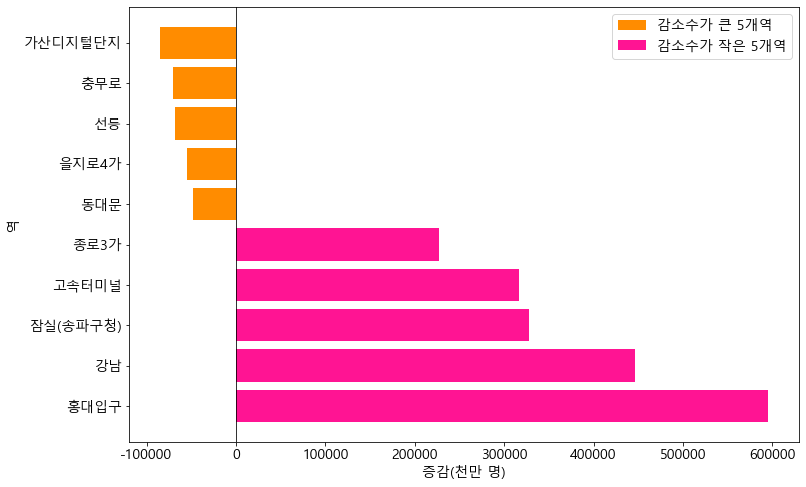

In [80]:
# 신내역 야간에만 운영하기때문에 삭제
subway2021 = subway2021.drop(subway2021[subway2021['역명']=='신내'].index)
subway2021 = subway2021.drop(subway2021[subway2021['역명']=='하남풍산'].index)
subway202101 = subway2021[subway2021['날짜'].str.contains('2021-01')]
subway202102 = subway2021[subway2021['날짜'].str.contains('2021-02')]
plotDifference(subway202012, subway202102)

,합 계_x,합 계_y,증감%
역명,,,
한양대,319344,276973,-13.268137
춘의,436696,401314,-8.102204
을지로4가,829720,775541,-6.529793
온수(성공회대입구),451882,423819,-6.210250
충무로,1133653,1063421,-6.195194
...,...,...,...
뚝섬유원지,313612,364450,16.210477
이태원,382426,457059,19.515671
한강진,319643,386950,21.056929


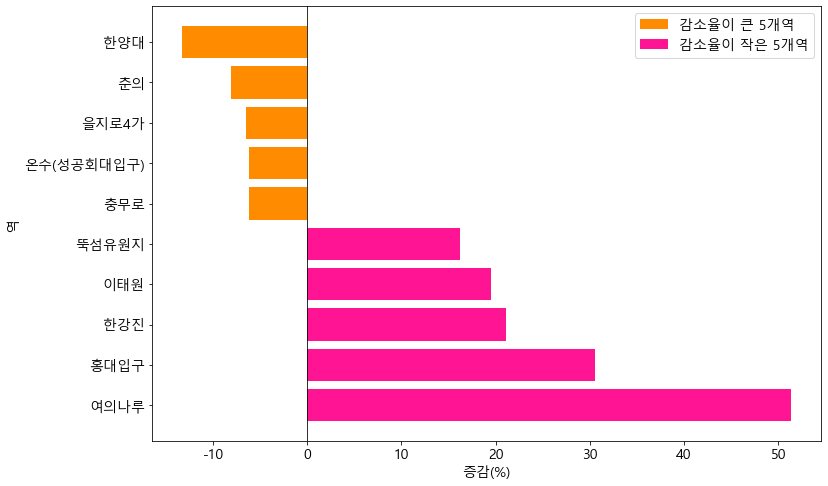

In [81]:
plotDifferencePercent(subway202012, subway202102)

,합 계_x,합 계_y,증감
역명,,,
도림천,62753,77329,14576
남태령,49728,65284,15556
신답,74710,91449,16739
용두(동대문구청),109876,129728,19852
장암,74156,95066,20910
...,...,...,...
서울역,2271134,2843495,572361
구로디지털단지,2579442,3178794,599352
사당,2656720,3280010,623290


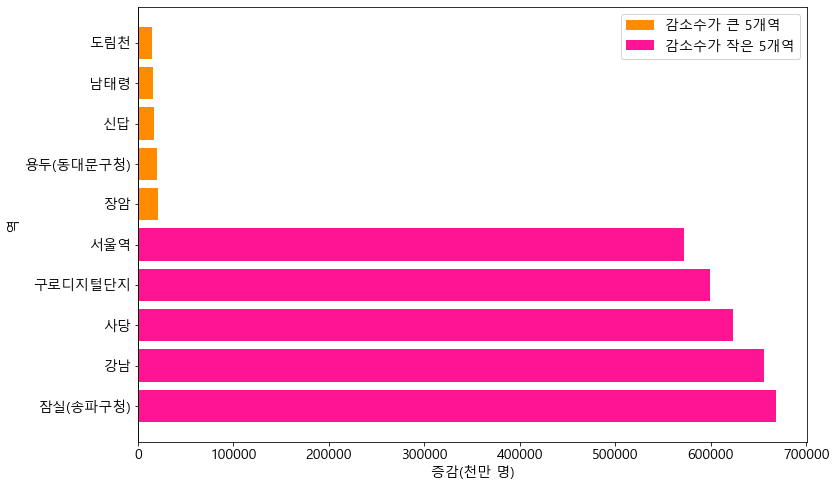

In [82]:
subway202104 = subway2021[subway2021['날짜'].str.contains('2021-04')]
plotDifference(subway202102, subway202104)

,합 계_x,합 계_y,증감%
역명,,,
신사,1446808,1632425,12.829415
홍대입구,2548239,2881829,13.091001
고속터미널,2686413,3053756,13.674107
상일동,703211,804255,14.368945
대치,494649,571747,15.586406
...,...,...,...
학여울,85363,127379,49.220388
종합운동장,301661,455298,50.930349
뚝섬유원지,364450,564877,54.994375


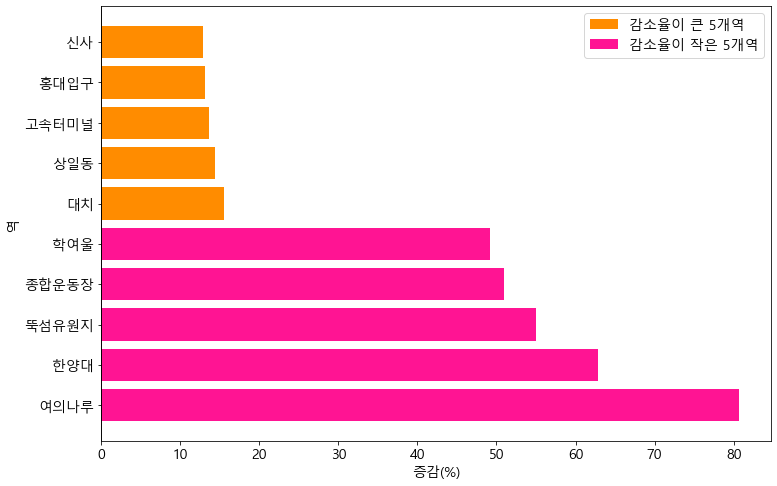

In [83]:
plotDifferencePercent(subway202102, subway202104)

In [75]:
subway2021[subway2021['날짜'].str.contains('2021-04')]

,날짜,호선,역번호,역명,구분,6시이전,6시-7시,7시-8시,8시-9시,9시-10시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시이후,합 계
50008,2021-04-01,1호선,150,서울역,승차,361,445,1507,2273,1470,...,2131,2637,4643,7461,3173,2089,2367,1634,402,41341
50009,2021-04-01,1호선,150,서울역,하차,233,1295,3802,8061,4730,...,1667,1643,2098,2446,1534,949,922,695,331,39087
50010,2021-04-01,1호선,151,시청,승차,69,103,239,284,295,...,1249,1391,2770,5700,2053,1674,1776,1208,174,21901
50011,2021-04-01,1호선,151,시청,하차,174,730,2738,7309,3109,...,707,564,617,713,255,168,157,129,47,22212
50012,2021-04-01,1호선,152,종각,승차,99,102,215,323,390,...,1786,2062,4464,7675,3311,2660,3515,2762,321,34568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66855,2021-04-30,8호선,2825,신흥,하차,28,145,132,284,181,...,290,322,450,676,517,277,253,278,157,4985
66856,2021-04-30,8호선,2826,수진,승차,131,228,657,877,370,...,271,287,321,316,177,114,81,97,22,5208
66857,2021-04-30,8호선,2826,수진,하차,22,87,121,421,213,...,258,296,339,581,473,277,246,301,194,4827
66858,2021-04-30,8호선,2827,모란,승차,71,114,320,450,234,...,260,382,300,405,233,130,159,206,42,4322


,합 계_x,합 계_y,증감
역명,,,
홍대입구,3156759,2528727,-628032
잠실(송파구청),4391726,3773554,-618172
고속터미널,3186927,2644124,-542803
강남,4199258,3703216,-496042
사당,3235359,2742988,-492371
...,...,...,...
도림천,73184,64543,-8641
용두(동대문구청),125341,116763,-8578
신답,88912,81622,-7290


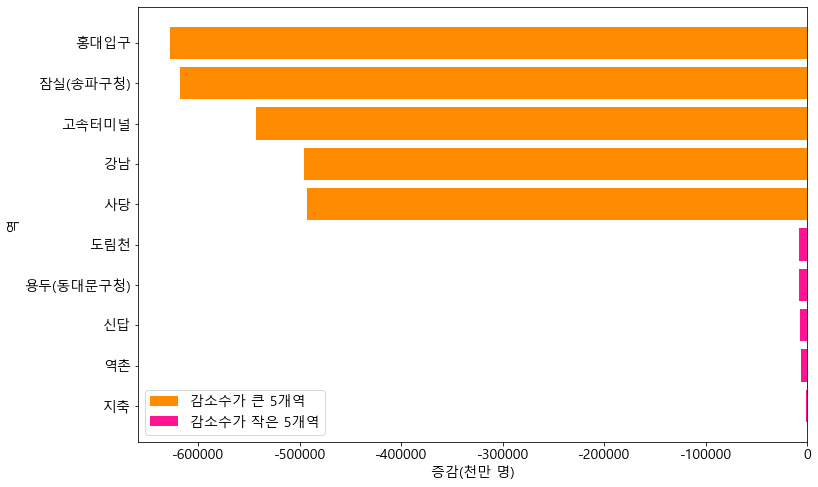

In [84]:
subway202105 = subway2021[subway2021['날짜'].str.contains('2021-05')]
subway202108 = subway2021[subway2021['날짜'].str.contains('2021-08')]
plotDifference(subway202105, subway202108)

,합 계_x,합 계_y,증감%
역명,,,
여의나루,782603,483274,-38.247873
학여울,121754,81382,-33.158664
부평구청,502805,342367,-31.908593
한양대,402058,286289,-28.794104
뚝섬유원지,563780,407139,-27.784065
...,...,...,...
대치,566724,534474,-5.690601
거여,419171,396223,-5.474615
춘의,466921,443516,-5.012625


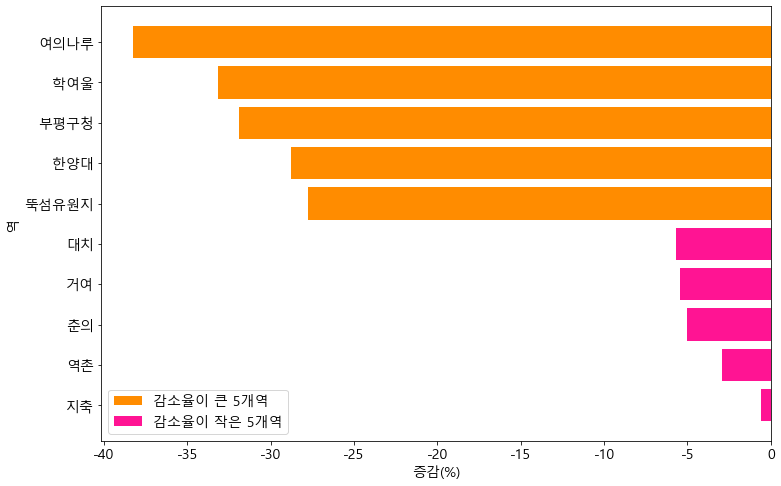

In [85]:
plotDifferencePercent(subway202105, subway202108)